<div align=center>
<h1>BANK CUSTOMER CHURN</h1>
<h2>Exploratory Data Analysis & Prediction Study</h2>
</br>
<img src="https://github.com/JesseDiGiacomo/kaggle-churn-prediction/blob/main/20944139.jpg?raw=true" alt="Designed by vectorjuice / Freepik" width=500>
</br>
<div>
<a href="http://www.freepik.com">Designed by vectorjuice / Freepik</a>
</div>
<h3>The aim is to accomplish the following:</h3>
<li>Identify and visualize which factors contribute to customer churn;</li>
<li>Build a prediction model to classify if a customer will churn or not.</li>
</div>






# Runtime environment setup

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 12.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=8760dd65e90d7651b1d8570653f906e8eba7f710216a6cf5bd722bd7ebef51a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-pco7bebj/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.4.0
    Uninstalling pandas-profiling-2.4.0:
      Successfully uninstalled pandas-profiling-2.4.0


In [2]:
# Imports
import os
import csv
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set()
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JesseDiGiacomo/kaggle-churn-prediction/main/Churn_Modelling.csv', encoding='utf_8')
df = pd.DataFrame(df)
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# Data set review and preparation

**In this section we explore the structure of our data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Drop Columns that contains specific information about the client.
They are client information that does not correlate to churn.

In [8]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# **From the data collected, we question:**

* **Data is not a time series and shows only a specific point in time.The balance feature is from a given date and leaves questions:**
> * **What is the date, and what relevant event happened on it?**
> * **Would it be possible to obtain balances over time for better analysis?**
> * **Some clients have exited but still, have a positive balance. Could they have exited from a product and not the bank?**


**Note:**

*For this study, data were analyzed without context.
In this field, context is fundamental to better understanding and modeling a more precise prediction system.*

# Exploratory data analysis

**This section's goal is to understand how the features relate to the 'Exit' status.**

In [13]:
# Explore Churn Breakdown
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Retained and Exited Clients')

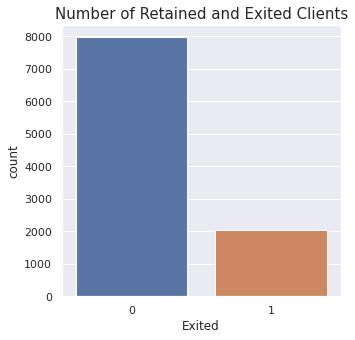

In [14]:
# Bar Plot of Churn
plt.figure(figsize=(5,5))
sns.countplot(df['Exited'])
plt.title("Number of Retained and Exited Clients", size = 15)

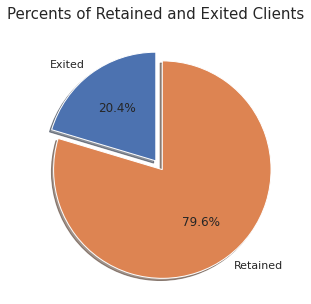

In [15]:
# Pie Graph Churn Percents
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Percents of Retained and Exited Clients", size=15)
plt.show()

**About 20% of the clients churned.**
> **The prediction model needs to ensure more than 80% accuracy to be efficient enough for the bank.**

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

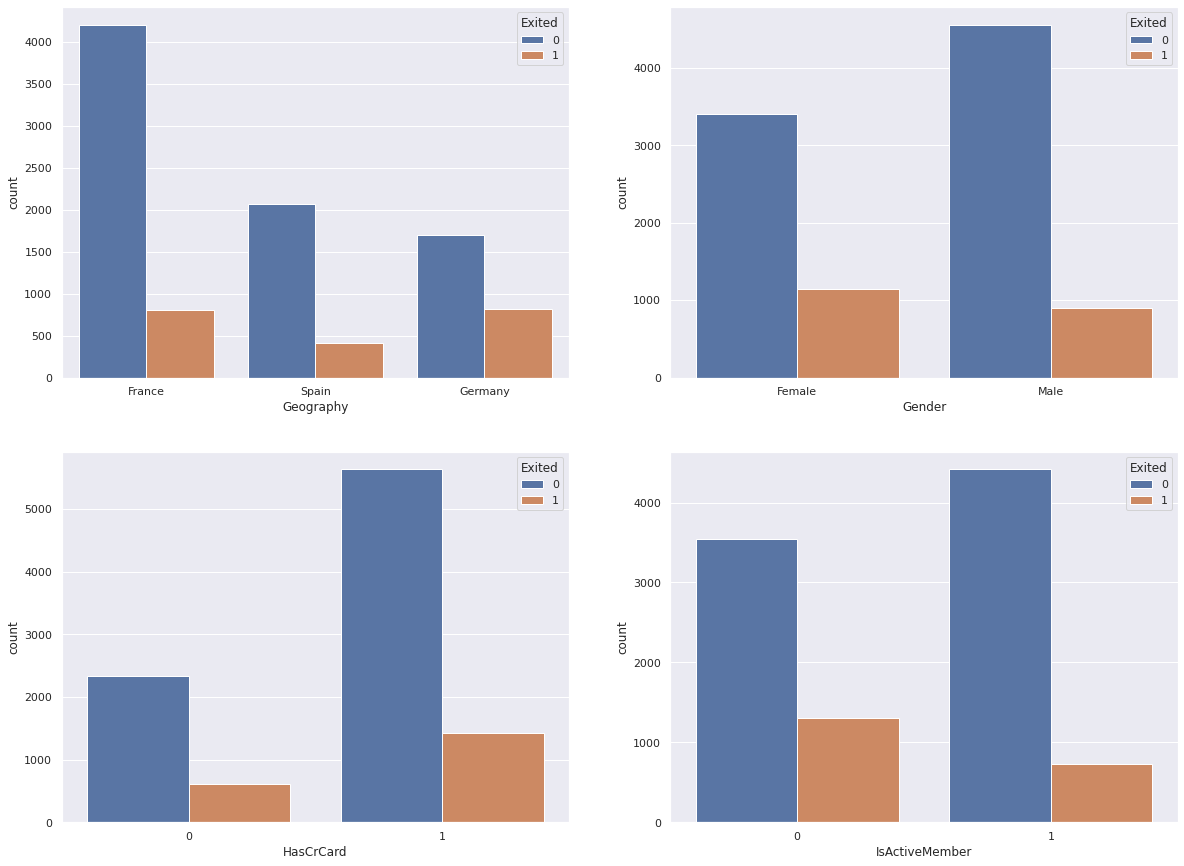

In [16]:
# Explore relation with categorical features
fig, axarray = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarray[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarray[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarray[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarray[1][1])

# Exploratory Categorical Features Graphs show:
>* **The majority of the clients are from France and the proportion of churned is inversely related to the number of clients. This could indicate bank problems such as not having enough customer service resources in the areas where it has fewer clients.**
>* **Even representing the less count proportion of clients, females churn more than male clients.**
>* **The majority of the clients that churned have credit cards, but proportionally, it doesn't look significant.**
>* **The inactive members have a greater churn. Surprisingly the proportion of inactive members is high. A good strategy for the bank would be a program to turn this group into active clients, as this could have a positive impact on client churn.**

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

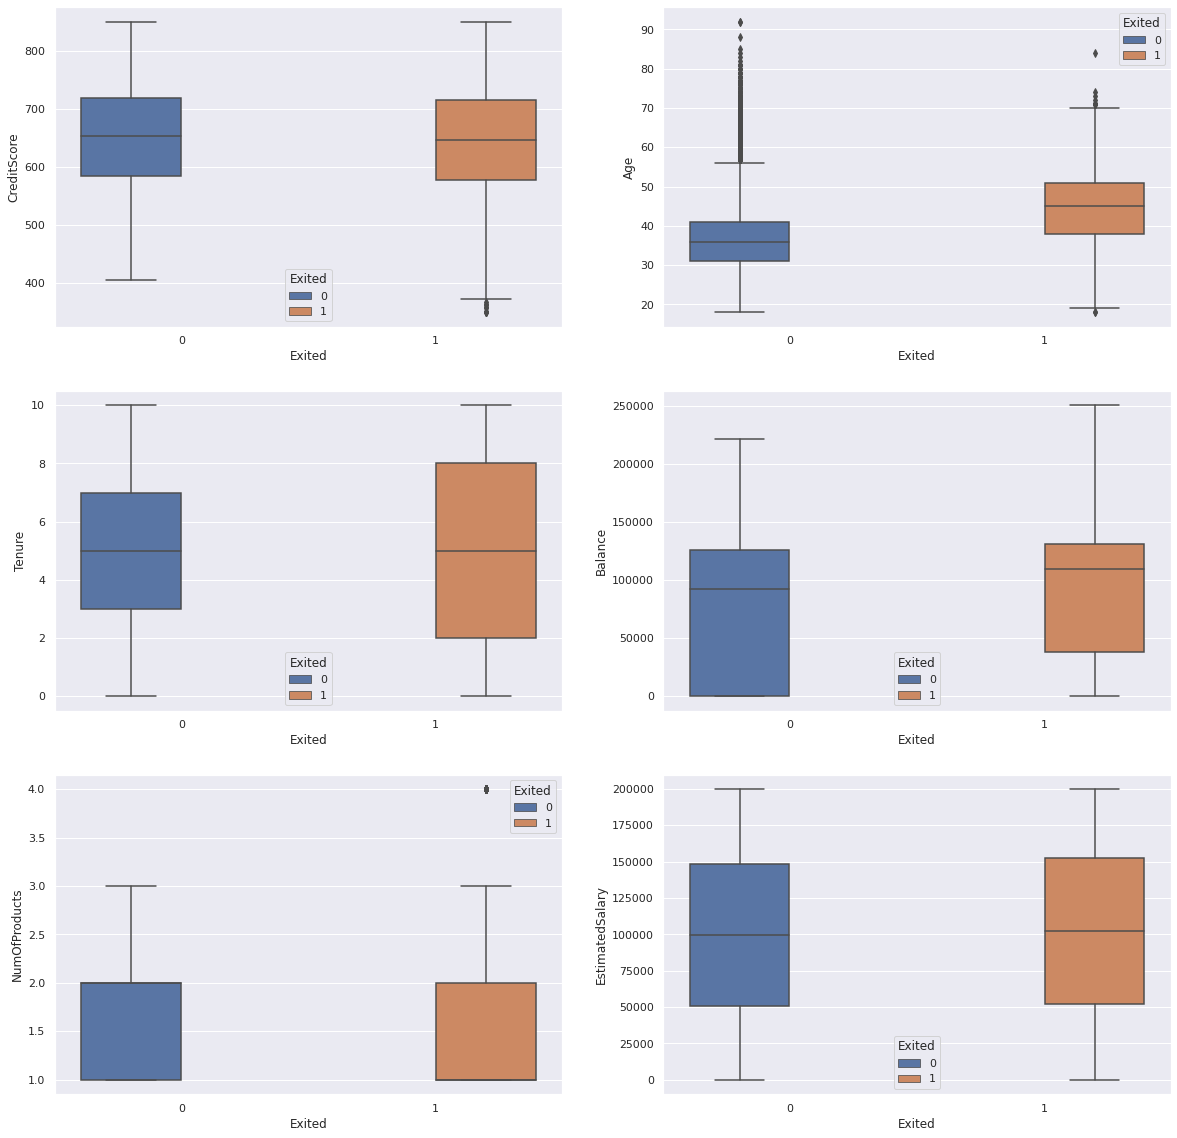

In [17]:
# Explore relation with continuous data features
fig, axarray = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarray[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarray[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarray[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarray[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarray[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarray[2][1])

# Exploratory Continuous Features Graphs show:
> * **There is no significant difference in credit score distribution between retained and exited clients.**
>* **Older clients are churning more than younger ones. This could be due to differences in services by age. The bank should review its strategy of retention based on age groups.**
>* **Clients on either extreme of tenure are more likely to churn compared to those on average.**
>* **The bank is losing clients with better balances.**
>* **Neither product nor salary has a significant effect on churn.**

**Generating features to better explore what impacts more on client churn**

Text(0.5, 1.0, 'Balance - Salary Ratio by Retained and Exited Clients')

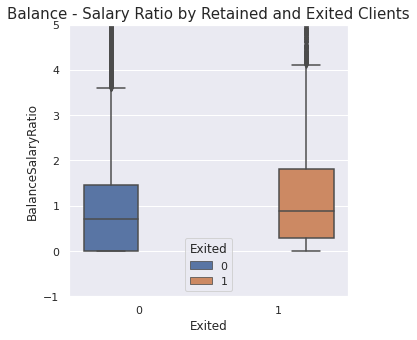

In [18]:
# Balance by Salary Feature
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
plt.figure(figsize=(5, 5))
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 5)
plt.title("Balance - Salary Ratio by Retained and Exited Clients", size=15)

**Salary has little effect on the chance of a client to churn. However, the ratio of bank balance and estimated salary, indicates that clients with a higher balance salary ratio churn more. Worrying information to the bank as this impacts their source capital.**

Text(0.5, 1.0, 'Tenure - Age Ratio by Retained and Exited Clients')

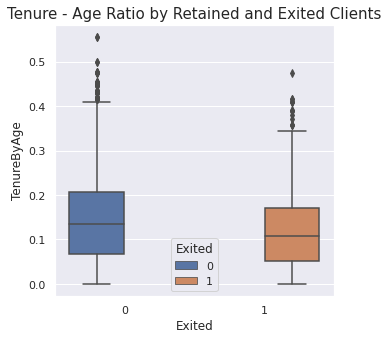

In [19]:
# Tenure by Age Feature
df['TenureByAge'] = df.Tenure/df.Age
plt.figure(figsize=(5, 5))
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df)
plt.title('Tenure - Age Ratio by Retained and Exited Clients', size=15)

Text(0.5, 1.0, 'Credit Score - Age Ratio by Retained and Exited Clients')

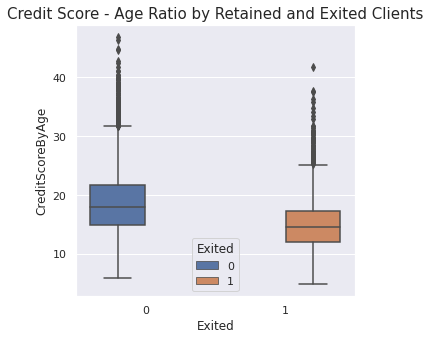

In [20]:
# Credit Score by Age Feature
df['CreditScoreByAge'] = df.CreditScore/df.Age
plt.figure(figsize=(5, 5))
sns.boxplot(y='CreditScoreByAge', x='Exited', hue='Exited', data=df)
plt.title('Credit Score - Age Ratio by Retained and Exited Clients', size=15)

**Tenure by age and Credit Score by age shows the effect of age on churn.**

In [21]:
# Checking Data Frame
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
0          1               1        101348.88       1            0.000000   
1          0               1        112542.58       0            0.744677   
2          1               0        113931.57       1            1.401375   
3          0               0         93826.63       0            0.000000   
4          1               1         79084.10       0            1.587055   

   TenureByAge  CreditScoreByAge  
0     0.047619         14.738095  
1     0.024390         14.829268  
2     0.190476         11.952381  
3     0.025641         17.923077  
4     0.046512         19.767442

# Data preparation for model fit

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  BalanceSalaryRatio  10000 non-null  float64
 12  TenureByAge         10000 non-null  float64
 13  CreditScoreByAge    10000 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 1.1+ MB


In [23]:
# Converting zeros to 1 so they can be equaly weighted 
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
0          1               1        101348.88       1            0.000000   
1         -1               1        112542.58       0            0.744677   
2          1              -1        113931.57       1            1.401375   
3         -1              -1         93826.63       0            0.000000   
4          1               1         79084.10       0            1.587055   

   TenureByAge  CreditScoreByAge  
0     0.047619         14.738095  
1     0.024390         14.829268  
2     0.190476         11.952381  
3     0.025641         17.923077  
4     0.046512         19.767442

In [24]:
# One hot encode the categorical features
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,0)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1         -1   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2         -1   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  TenureByAge  \
0               1        101348.88       1            0.000000     0.047619   
1               1        112542.58       0            0.744677     0.024390   
2              -1        113931.57       1            1.401375     0.190476   
3              -1         93826.63       0            0.000000     0.025641   
4               1         79084.10       0            1.587055     0.046512   

   CreditScoreByAge  Geography_France  Geography_Spain  Geography_Germany  \
0         14.738095                 1                0                  0   
1         14.829268                 0                1                  0   
2         11.952381                 1                0                  0   
3         17.923077                 1                0                  0   
4         19.767442                 0                1                  0   

   Gender_Female  Gender_Male  
0              1            0  
1              1            0  
2              1            0  
3              1            0  
4              1            0

In [25]:
# minMax scaling the continuous features
continuous_vars = ['CreditScore',
                   'Age',
                   'Tenure',
                   'Balance',
                   'NumOfProducts',
                   'EstimatedSalary',
                   'BalanceSalaryRatio',
                   'TenureByAge',
                   'CreditScoreByAge']
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324     0.2  0.000000       0.000000          1   
1        0.516  0.310811     0.1  0.334031       0.000000         -1   
2        0.304  0.324324     0.8  0.636357       0.666667          1   
3        0.698  0.283784     0.1  0.000000       0.333333         -1   
4        1.000  0.337838     0.2  0.500246       0.000000          1   

   IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  TenureByAge  \
0               1         0.506735       1            0.000000     0.085714   
1               1         0.562709       0            0.000070     0.043902   
2              -1         0.569654       1            0.000132     0.342857   
3              -1         0.469120       0            0.000000     0.046154   
4               1         0.395400       0            0.000150     0.083721   

   CreditScoreByAge  Geography_France  Geography_Spain  Geography_Germany  \
0          0.235083                 1                0                  0   
1          0.237252                 0                1                  0   
2          0.168807                 1                0                  0   
3          0.310859                 1                0                  0   
4          0.354739                 0                1                  0   

   Gender_Female  Gender_Male  
0              1            0  
1              1            0  
2              1            0  
3              1            0  
4              1            0

<AxesSubplot:>

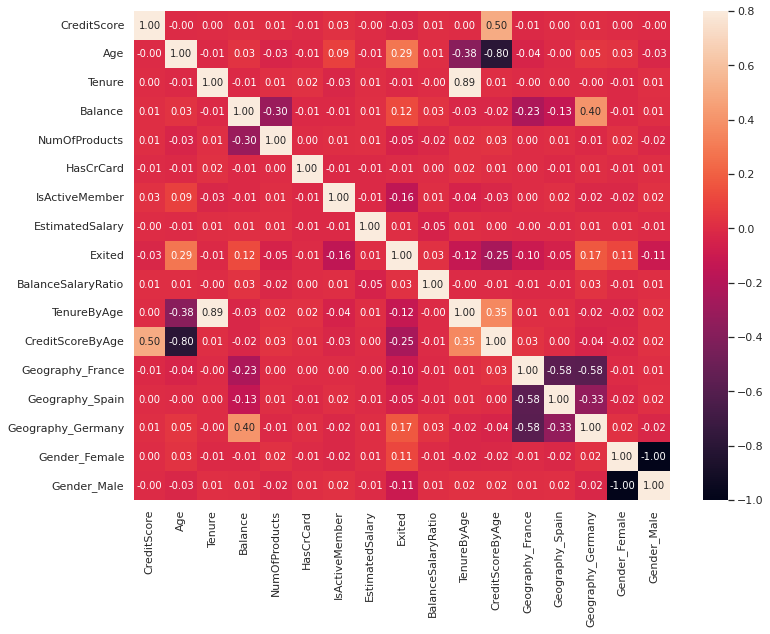

In [26]:
# Correlation Analysis
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [27]:
corr_list = corr['Exited'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

Age                   0.285323
Geography_Germany     0.173488
Balance               0.118533
Gender_Female         0.106512
BalanceSalaryRatio    0.025558
EstimatedSalary       0.012097
HasCrCard            -0.007138
Tenure               -0.014001
CreditScore          -0.027094
NumOfProducts        -0.047820
Geography_Spain      -0.052667
Geography_France     -0.104955
Gender_Male          -0.106512
TenureByAge          -0.121641
IsActiveMember       -0.156128
CreditScoreByAge     -0.253437
Name: Exited, dtype: float64

In [28]:
# Spliting Data

pred = df.drop('Exited',axis=1)
clas = df['Exited']

In [29]:
clf=RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(pred, clas)

RandomForestClassifier(random_state=7)

In [30]:
feature_imp = pd.Series(clf.feature_importances_,index=pred.columns).sort_values(ascending=False)
feature_imp

Age                   0.160846
CreditScoreByAge      0.129885
NumOfProducts         0.122833
CreditScore           0.094406
EstimatedSalary       0.090435
Balance               0.088982
TenureByAge           0.078265
BalanceSalaryRatio    0.074865
Tenure                0.044626
IsActiveMember        0.041630
Geography_Germany     0.020445
HasCrCard             0.013586
Geography_France      0.010274
Gender_Female         0.009889
Gender_Male           0.009674
Geography_Spain       0.009360
dtype: float64

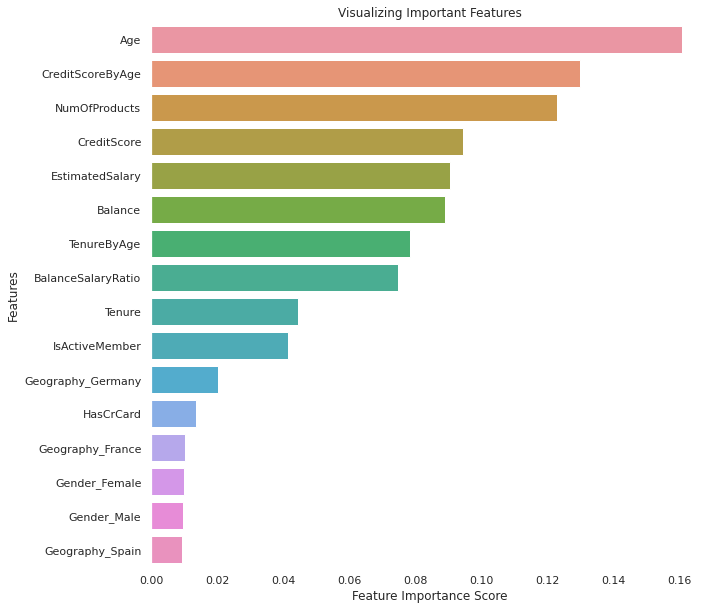

In [31]:
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**This graph list features that have more impact on churn**

>* **Age, Credit Score by Age, and Number of Products are the three most influential features on clients' churn.**
>* **For this study, we selected features that affect at least 30%.**

In [32]:
# Selecting most important features
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

Age: 16%
CreditScoreByAge: 13%
NumOfProducts: 12%
CreditScore: 9%
EstimatedSalary: 9%
Balance: 9%
TenureByAge: 8%
BalanceSalaryRatio: 7%
Tenure: 4%
IsActiveMember: 4%


In [33]:
# Trainning models using just the selected features
pred = df[features_selected]
clas = df['Exited']

#Model fitting and selection
**We tested the following models:**
>* **LR - Linear Regression**
>* **KNN -  K-Nearest Neighbors**
>* **CART - Classification and Regression Trees**
>* **NB - Naive Bayes**
>* **SVM - Support Vector Machine**
>* **RF - Random Forest**


In [34]:
# Creating Pipelines to test multiple models
# Using StandardScaler to normalize values

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVC())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
results = []
names = []

# Loop for each model
for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)
    cross_val_result = model_selection.cross_val_score(model, 
                                                     pred, 
                                                     clas, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    results.append(cross_val_result)
    names.append(name)
    text = "%s: %f (%f)" % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

Scaled-LR: 0.816400 (0.006280)
Scaled-KNN: 0.836900 (0.006877)
Scaled-CART: 0.783300 (0.008161)
Scaled-NB: 0.803100 (0.008068)
Scaled-SVM: 0.853700 (0.009285)
Scaled-RF: 0.850700 (0.008210)


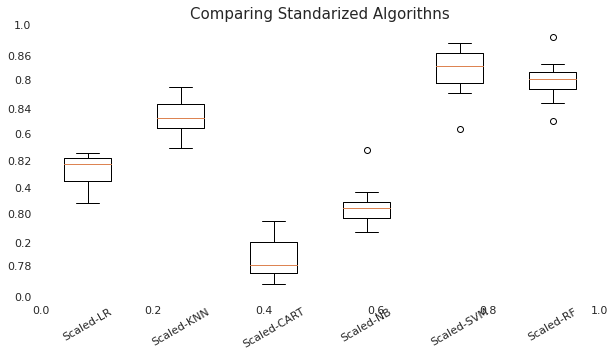

In [35]:
# Visulizing Scores

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Comparing Standarized Algorithns', size=15)
ax1 = fig1.add_subplot(111)
plt.boxplot(results)
ax1.set_xticklabels(names, rotation=30)
plt.show()

**The most efficient models were Support Vector Machine (SVM) with 85.37% of accuracy followed by Random Forest (RF) with 84.81% of accuracy.**

**Now we try different settings to optimize both and try to improve their metrics.**

In [36]:
# Optimizing SVM

# Defining Scale
scaler = StandardScaler()
pred = scaler.fit_transform(pred)

# Defining Model and Performance Measure
model = svm.SVC(probability = True, random_state = 1)
 
# Grid Search for 20 combinations of parameters
grid_list = {'C': np.arange(2, 10, 2),
             'gamma': np.arange(0.1, 1, 0.2)}
 
grid = GridSearchCV(model, param_grid = grid_list, n_jobs = 4, cv = 3, scoring = 'accuracy') 
grid.fit(pred, clas) 
grid.cv_results_


# Print results
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Best param:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.8545,std:0.00226,params:{'C': 2, 'gamma': 0.1}
mean:0.8521,std:0.00404,params:{'C': 2, 'gamma': 0.30000000000000004}
mean:0.8475,std:0.00344,params:{'C': 2, 'gamma': 0.5000000000000001}
mean:0.8417,std:0.004,params:{'C': 2, 'gamma': 0.7000000000000001}
mean:0.8317,std:0.00309,params:{'C': 2, 'gamma': 0.9000000000000001}
mean:0.8541,std:0.00274,params:{'C': 4, 'gamma': 0.1}
mean:0.8511,std:0.00363,params:{'C': 4, 'gamma': 0.30000000000000004}
mean:0.8398,std:0.0026,params:{'C': 4, 'gamma': 0.5000000000000001}
mean:0.8248,std:0.00345,params:{'C': 4, 'gamma': 0.7000000000000001}
mean:0.8158,std:0.00438,params:{'C': 4, 'gamma': 0.9000000000000001}
mean:0.8542,std:0.00341,params:{'C': 6, 'gamma': 0.1}
mean:0.8474,std:0.00136,params:{'C': 6, 'gamma': 0.30000000000000004}
mean:0.8318,std:0.00359,params:{'C': 6, 'gamma': 0.5000000000000001}
mean:0.8167,std:0.00543,params:{'C': 6, 'gamma': 0.7000000000000001}
mean:0.8059,std:0.0054,params:{'C': 6, 'gamma':

In [37]:
# Optimizing Random Forest

# Defining Scale
scaler = StandardScaler()
pred = scaler.fit_transform(pred)

# Possible estimators values
val_estimators = [20, 50, 100, 150, 200]

# Possible values for division
val_criterion = ['gini', 'entropy']

# Defining dic to receive list of parameters
param_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Creating model
model_random = RandomForestClassifier()

# Defining K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testing differents combinations with parameters
grid = RandomizedSearchCV(estimator = model_random, param_distributions = param_grid, cv = kfold, scoring = 'accuracy')
grid.fit(pred, clas)

# Print results
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Best param:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.8458,std:0.00883,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.85,std:0.00844,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.8499,std:0.00802,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.8503,std:0.00908,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.8491,std:0.00835,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.8481,std:0.00483,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.8473,std:0.0065,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.8501,std:0.00823,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.851,std:0.00906,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.8499,std:0.00966,params:{'n_estimators': 200, 'criterion': 'entropy'}

Best param:{'n_estimators': 150, 'criterion': 'entropy'}, Score:0.851


# Trying a Deep Learning aproach

In [38]:
pred.shape

(10000, 10)

In [39]:
clas.shape

(10000,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(pred, clas, test_size=0.2, random_state=7)

In [41]:
X_train.shape

(8000, 10)

In [42]:
modelDL = keras.Sequential([
                            keras.layers.Dense(10, input_shape=(10,), activation='relu'),
                            keras.layers.Dense(5, input_shape=(10,), activation='relu'),
                            keras.layers.Dense(1, input_shape=(10,), activation='sigmoid'),
])

modelDL.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelDL.fit(X_train, y_train, epochs=200)

2022-06-24 22:58:21.552152: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-24 22:58:21.708326: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.6322 - accuracy: 0.6802
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7970
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8105
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8236
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8304
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8355
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8414
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8436
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8481
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3730 - accura

In [43]:
modelDL.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8580


[0.35715383291244507, 0.8579999804496765]

In [44]:
yp = modelDL.predict(X_test)

In [45]:
y_pred = []
for i in yp:
  if i > 0.8:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1589
           1       0.95      0.25      0.39       411

    accuracy                           0.84      2000
   macro avg       0.90      0.62      0.65      2000
weighted avg       0.86      0.84      0.80      2000



Text(66.5, 0.5, 'Truth')

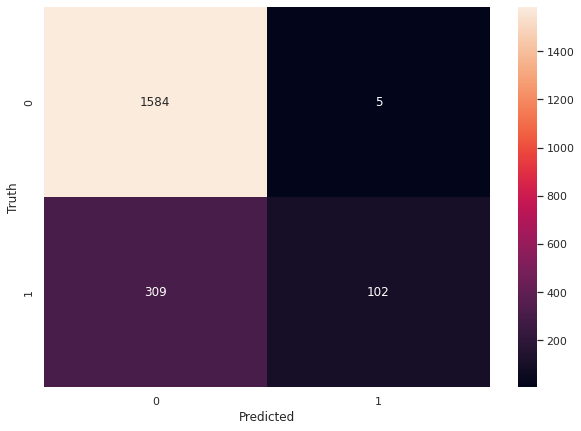

In [47]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Deep Learning (DL) showed impressive results with 85.80% accuracy. After fine-tuning, the Support Vector Machine (SVM) showed 85.45% accuracy.**

**Both models are timing-consuming.**

**For long-term use, probably the Deep Learning approach would be more accurate and time-efficient**

# Saving the Deep Learning Model and its weights for future use.



In [48]:
# serialize model to JSON
model_json = modelDL.to_json()
with open("modelDL.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelDL.save_weights("modelDL_Weights.h5")
print("Saved DL model to disk")

Saved DL model to disk
